In [37]:
import matplotlib.pyplot as plt

## Introduction:
You can use this ipython notebook as a template for the rest of the homework.

### 0. Basic Useful Setups:

In [18]:
### Basic setups
import sys
sys.path.append('./models/')
# Enable automatic reload of libraries
%load_ext autoreload
# All modules are reloaded before every comment
%autoreload 2
import keras

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Read MNIST using Keras

In [22]:
from util import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()

11501568/11490434 [==============================] - 2s 0us/step
('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


### 1. Load LetNet Model

In [35]:
from keras.utils.vis_utils import plot_model # can be used to plot the model into a png file.
from LeNet import LeNet


In [ ]:
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)

### 2. Train and Evaluate LeNet Model

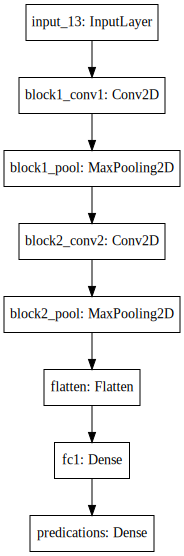

In [55]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [56]:
# train model
BATCH_SIZE = 128
MAX_EPOCH = 12

histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.1774 - acc: 0.9447 - val_loss: 0.0481 - val_acc: 0.9845
Epoch 2/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0438 - acc: 0.9863 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0294 - acc: 0.9909 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0203 - acc: 0.9936 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 3s 54us/step - loss: 0.0151 - acc: 0.9957 - val_loss: 0.0314 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 3s 58us/step - loss: 0.0111 - acc: 0.9966 - val_loss: 0.0246 - val_acc: 0.9925
Epoch 7/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.0237 - val_acc

In [61]:
model.history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [ ]:
plt.plot(model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training loss')

In [ ]:
plt.plot(model.history.history[''])
plt.xlabel('Epoch')
plt.ylabel('Test loss')

('Test loss:', 0.03134940225539128)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
('Test accuracy:', 0.9936)

<b>Architecture 2</b>

In [43]:
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# train model
BATCH_SIZE = 512
MAX_EPOCH = 20

histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 20)        520       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 20)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 50)        25050     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 500)               1225500   
__________

<b>Using SGD</b>

In [46]:
from keras import optimizers

In [ ]:

NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# train model
BATCH_SIZE = 512
MAX_EPOCH = 40
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)


<b>Optimizer RMS Prop</b>

In [ ]:
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [ ]:
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# train model
BATCH_SIZE = 512
MAX_EPOCH = 20

histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)

In [52]:
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# train model
BATCH_SIZE = 512
MAX_EPOCH = 40
model.compile(loss='mean_absolute_error', optimizer=sgd, metrics=['accuracy'])
histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 20)        520       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 20)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 50)        25050     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 500)               1225500   
__________

In [53]:
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# train model
BATCH_SIZE = 20000
MAX_EPOCH = 20

histroy=model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# You can plot the model into a png file and use it in your report.
# pngModelPath = _____
# plot(model, to_file=pngModelPath, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 20)        520       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 20)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 50)        25050     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 500)               1225500   
__________